In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
IMAGES_DIR = "../data/raw/bin-images/"
META_DIR = "../data/raw/metadata/"

filenames = [f.replace(".jpg", "") for f in os.listdir(IMAGES_DIR) if f.endswith(".jpg")]

print("Total images found:", len(filenames))

Total images found: 999


In [3]:
print(filenames[:5]) 

['00001', '00002', '00003', '00004', '00005']


In [4]:
# Build DataFrame with ASINs, quantities, etc.

records = []

for name in filenames:
    meta_path = os.path.join(META_DIR, name + ".json")
    with open(meta_path, "r") as f:
        meta = json.load(f)
    
    bin_data = meta.get("BIN_FCSKU_DATA", {})

    for asin, item in bin_data.items():
        if not isinstance(item, dict):
            continue
            
        qty = item.get("quantity", 1)
        normalized_name = item.get("normalizedName", "")

        height = item.get("height", {}) or {}
        height_value = height.get("value", 0)
        height_unit = height.get("unit", "IN")

        length = item.get("length", {}) or {}
        length_value = length.get("value", 0)
        length_unit = length.get("unit", "IN")

        width = item.get("width", {}) or {}
        width_value = width.get("value", 0)
        width_unit = width.get("unit", "IN")

        weight = item.get("weight", {}) or {}
        weight_value = weight.get("value", 0)
        weight_unit = weight.get("unit", "pounds")

        records.append([name, asin, qty, normalized_name, height_value, height_unit,
                       length_value, length_unit, width_value, width_unit, weight_value, weight_unit])

df = pd.DataFrame(records, columns=["image_id", "asin", "quantity", "normalized_name",
                                  "height_value", "height_unit",
                                  "length_value", "length_unit",
                                  "width_value", "width_unit",
                                  "weight_value", "weight_unit"])

In [5]:
df.head()

,image_id,asin,quantity,normalized_name,height_value,height_unit,length_value,length_unit,width_value,width_unit,weight_value,weight_unit
0,00001,B000C33MI2,4,FRAM XG7317 ULTRA Spin-On Oil Filter with Sure...,2.799213,IN,3.901575,IN,2.901575,IN,0.300005,pounds
1,00001,B0050Z27KG,2,Suncatcher - Axicon Rainbow Window - Includes ...,0.900000,IN,11.300000,IN,7.700000,IN,0.500000,pounds
2,00001,B01BV89HNU,6,"2 Pack Type C, iOrange-E 6.6 Ft Braided Cable ...",2.200000,IN,4.000000,IN,3.900000,IN,0.350000,pounds
3,00002,0307981584,13,Thomas Saves Easter! (Thomas & Friends) (Glitt...,0.400000,IN,7.900000,IN,6.900000,IN,0.400000,pounds
4,00002,B000052XHI,2,"First Response Early Result Pregnancy Test, 3 ...",1.600000,IN,7.800000,IN,3.300000,IN,0.022046,pounds


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_id         2702 non-null   object 
 1   asin             2702 non-null   object 
 2   quantity         2702 non-null   int64  
 3   normalized_name  2702 non-null   object 
 4   height_value     2702 non-null   float64
 5   height_unit      2702 non-null   object 
 6   length_value     2702 non-null   float64
 7   length_unit      2702 non-null   object 
 8   width_value      2702 non-null   float64
 9   width_unit       2702 non-null   object 
 10  weight_value     2702 non-null   float64
 11  weight_unit      2702 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 253.4+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

image_id           0
asin               0
quantity           0
normalized_name    0
height_value       0
height_unit        0
length_value       0
length_unit        0
width_value        0
width_unit         0
weight_value       0
weight_unit        0
dtype: int64

In [9]:
df = df.drop(columns=["height_unit", "length_unit", "width_unit", "weight_unit"])

In [10]:
df.head()

,image_id,asin,quantity,normalized_name,height_value,length_value,width_value,weight_value
0,00001,B000C33MI2,4,FRAM XG7317 ULTRA Spin-On Oil Filter with Sure...,2.799213,3.901575,2.901575,0.300005
1,00001,B0050Z27KG,2,Suncatcher - Axicon Rainbow Window - Includes ...,0.900000,11.300000,7.700000,0.500000
2,00001,B01BV89HNU,6,"2 Pack Type C, iOrange-E 6.6 Ft Braided Cable ...",2.200000,4.000000,3.900000,0.350000
3,00002,0307981584,13,Thomas Saves Easter! (Thomas & Friends) (Glitt...,0.400000,7.900000,6.900000,0.400000
4,00002,B000052XHI,2,"First Response Early Result Pregnancy Test, 3 ...",1.600000,7.800000,3.300000,0.022046


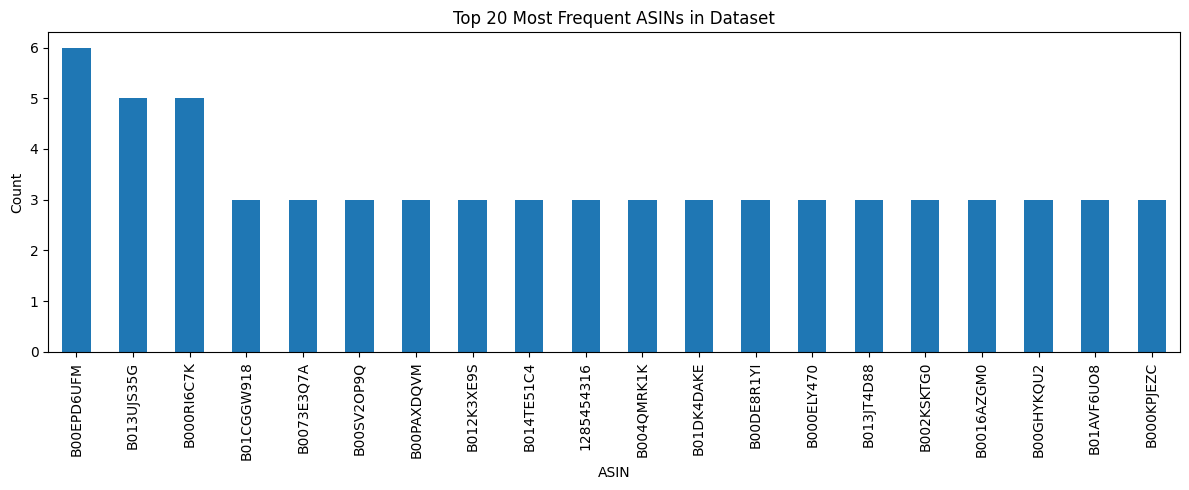

In [11]:
plt.figure(figsize=(12,5))
df["asin"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Most Frequent ASINs in Dataset")
plt.xlabel("ASIN")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

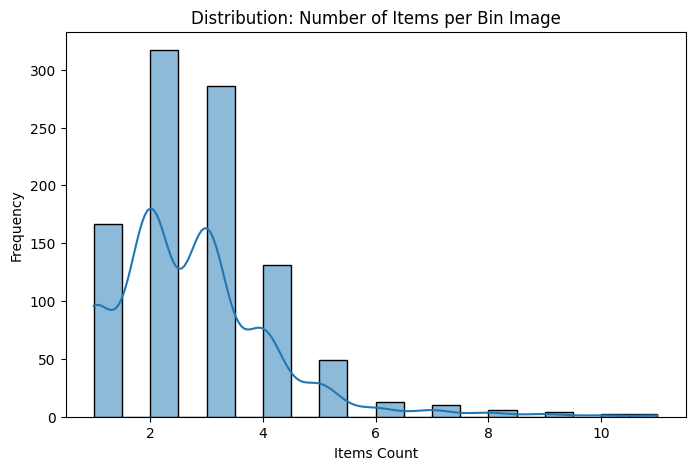

In [12]:
items_per_image = df.groupby("image_id")["asin"].count()

plt.figure(figsize=(8,5))
sns.histplot(items_per_image, bins=20, kde=True)
plt.title("Distribution: Number of Items per Bin Image")
plt.xlabel("Items Count")
plt.ylabel("Frequency")
plt.show()

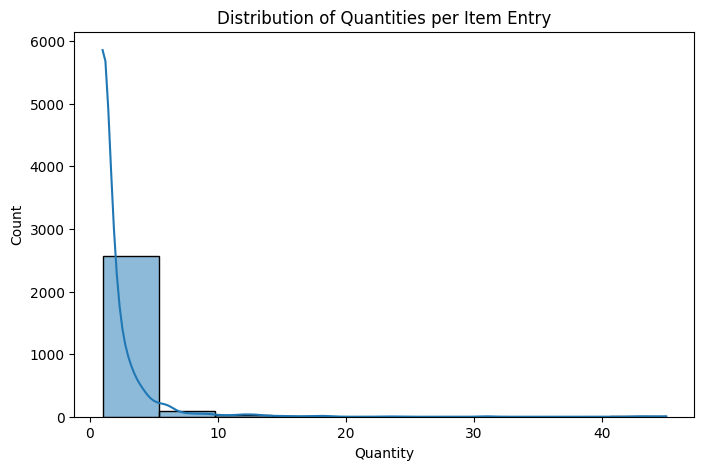

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["quantity"], bins=10, kde=True)
plt.title("Distribution of Quantities per Item Entry")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

In [14]:
df.to_csv("../data/processed/metadata.csv", index=False)

In [15]:
df['normalized_name'].value_counts()

normalized_name
Full Extra Long (XL) SureGuard Mattress Protector - 100% Waterproof, Hypoallergenic - Premium Fitted Cotton Terry Cover - 10 Year Warranty                                    6
TaoTronics TT-AH002 30W Ultrasonic Humidifier with Cool Mist, Classic Dial Knob Control, 3.5L Large Capacity, Two 360 degree Rotatable Outlets                                5
Feliway - Refill, 48 ml                                                                                                                                                       5
Shake Weight for Women With Bonus Video Content                                                                                                                               3
Aprince Silicone Baking Mat Set (2) Non-Stick Cookie Sheet (Silicone Mat 2)                                                                                                   3
                                                                                                        